In [ ]:
import yaml
import pandas as pd
import numpy as np
import re

# exp_name = "GNNv3_v14_tuner_config_Criteo_distill"
# exp_name = "GNNv3_v17_tuner_config_Criteo"
# exp_name = "GNNv3_v19_tuner_config_Criteo"
# exp_name = "FinalNet_tuner_config_Criteo2"

# exp_name = "SCV_ada_tf_tuner_config_Criteo"
# exp_name = "SCV_heavy_loca_tuner_config_Criteo"
# exp_name = "SCV_light_loca_tuner_config_Criteo"
# exp_name = "SCV_light_loca_adadis_Criteo"
exp_name = "SCV_light_loca_adadis_dropout_tuner_config_Criteo"
exp_name = "SCV_light_loca_adadis_mask_tuner_config_Criteo"

# exp_name = "GNNv3_v14_tuner_config_Avazu"
# exp_name = "GNNv3_v14_tuner_config_Avazu3"
# exp_name = "GNNv3_v14_tuner_config_iPinYou_heavy"
# exp_name = "GNNv3_v14_tuner_config_iPinYou3"
# exp_name = "GNNv3_v14_tuner_config_iPinYou"
# exp_name = "GNNv3_v8_tuner_confi2g_iPinYou"
df_path = exp_name+".csv"
config_path = f"config/{exp_name}/model_config.yaml"

In [2]:
exp_df = pd.read_csv(df_path, names=["timestamp", "command", "exp_id", "dataset_id", "train", "val", "test"])
exp_df

,timestamp,command,exp_id,dataset_id,train,val,test
0,20250315-041911,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_006_5d6d...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437638 - AUC: 0.814324,[test] logloss: 0.437317 - AUC: 0.814705
1,20250315-231947,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_307_ca73...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437598 - AUC: 0.814382,[test] logloss: 0.437220 - AUC: 0.814833
2,20250315-234645,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_133_6a5b...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437609 - AUC: 0.814424,[test] logloss: 0.437215 - AUC: 0.814847
3,20250316-001157,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_236_5194...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.438116 - AUC: 0.813726,[test] logloss: 0.437641 - AUC: 0.814285
4,20250316-001213,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_146_fe31...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437514 - AUC: 0.814445,[test] logloss: 0.437131 - AUC: 0.814898
...,...,...,...,...,...,...,...
302,20250324-223338,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_287_eb79...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437714 - AUC: 0.814305,[test] logloss: 0.437372 - AUC: 0.814713
303,20250324-231324,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_186_6347...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437712 - AUC: 0.814246,[test] logloss: 0.437276 - AUC: 0.814735
304,20250324-231541,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_338_7449...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437600 - AUC: 0.814327,[test] logloss: 0.437226 - AUC: 0.814770
305,20250324-234256,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_adadis_Criteo_100_2986...,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.438451 - AUC: 0.813445,[test] logloss: 0.438017 - AUC: 0.813925


In [3]:
exp_df = exp_df[["exp_id", "test"]]
exp_df["exp_id"] = exp_df["exp_id"].apply(lambda x: str(x.split("[exp_id]")[1]).strip())
exp_df["test"] = exp_df["test"].apply(lambda x: x.split("[test]")[1])
exp_df["test"] = exp_df["test"].apply(lambda x: [eval(item) for item in re.findall(r"\d+\.\d+|\d+", x)])
exp_df[['logloss', 'AUC']] = pd.DataFrame(exp_df['test'].to_list(), index=exp_df.index)
del exp_df["test"]
exp_df

/tmp/ipykernel_479539/2652527789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["exp_id"] = exp_df["exp_id"].apply(lambda x: str(x.split("[exp_id]")[1]).strip())
/tmp/ipykernel_479539/2652527789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["test"] = exp_df["test"].apply(lambda x: x.split("[test]")[1])
/tmp/ipykernel_479539/2652527789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,exp_id,logloss,AUC
0,SCV_light_loca_adadis_Criteo_006_5d6df47d,0.437317,0.814705
1,SCV_light_loca_adadis_Criteo_307_ca733a7c,0.437220,0.814833
2,SCV_light_loca_adadis_Criteo_133_6a5b619f,0.437215,0.814847
3,SCV_light_loca_adadis_Criteo_236_5194b7be,0.437641,0.814285
4,SCV_light_loca_adadis_Criteo_146_fe31baa4,0.437131,0.814898
...,...,...,...
302,SCV_light_loca_adadis_Criteo_287_eb79292b,0.437372,0.814713
303,SCV_light_loca_adadis_Criteo_186_63479e5c,0.437276,0.814735
304,SCV_light_loca_adadis_Criteo_338_7449eb69,0.437226,0.814770
305,SCV_light_loca_adadis_Criteo_100_29865041,0.438017,0.813925


In [4]:
with open(config_path) as f:
    config_lst = yaml.load(f, Loader=yaml.FullLoader)
hyperparam_keys = list(list(config_lst.values())[0].keys())
total_exp_len = len(config_lst)
hyperparam_keys

['alpha',
 'batch_norm',
 'batch_size',
 'dataset_id',
 'debug_mode',
 'distill_loss',
 'early_stop_patience',
 'embedding_dim',
 'embedding_regularizer',
 'epochs',
 'eval_steps',
 'feature_config',
 'feature_specs',
 'group_id',
 'layer_norm',
 'learning_rate',
 'loss',
 'metrics',
 'model',
 'model_root',
 'monitor',
 'monitor_mode',
 'net_dropout',
 'net_regularizer',
 'num_hops',
 'num_mask',
 'num_tower',
 'num_workers',
 'optimizer',
 'pickle_feature_encoder',
 'pooling_method',
 'save_best_only',
 'scv_dropout',
 'seed',
 'shuffle',
 'subs_origin_loss',
 'task',
 'use_bilinear_fusion',
 'use_features',
 'verbose']

In [5]:
config_df = pd.DataFrame(config_lst).T
config_df["exp_id"] = config_df.index
config_df["exp_id"] = config_df["exp_id"].apply(lambda x : str(x).strip())
config_df

,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,embedding_dim,embedding_regularizer,epochs,...,save_best_only,scv_dropout,seed,shuffle,subs_origin_loss,task,use_bilinear_fusion,use_features,verbose,exp_id
SCV_light_loca_adadis_Criteo_001_a2f71d83,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_001_a2f71d83
SCV_light_loca_adadis_Criteo_002_85fe67f3,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_002_85fe67f3
SCV_light_loca_adadis_Criteo_003_1bf00cb8,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_003_1bf00cb8
SCV_light_loca_adadis_Criteo_004_d36f013c,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_004_d36f013c
SCV_light_loca_adadis_Criteo_005_159067dd,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_005_159067dd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCV_light_loca_adadis_Criteo_508_261d91d1,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0.3,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_508_261d91d1
SCV_light_loca_adadis_Criteo_509_4cafab76,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0.3,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_509_4cafab76
SCV_light_loca_adadis_Criteo_510_1f3dbd1f,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0.3,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_510_1f3dbd1f
SCV_light_loca_adadis_Criteo_511_1126b7d0,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,0.3,2024,True,False,binary_classification,True,None,1,SCV_light_loca_adadis_Criteo_511_1126b7d0


In [6]:
exp_df

,exp_id,logloss,AUC
0,SCV_light_loca_adadis_Criteo_006_5d6df47d,0.437317,0.814705
1,SCV_light_loca_adadis_Criteo_307_ca733a7c,0.437220,0.814833
2,SCV_light_loca_adadis_Criteo_133_6a5b619f,0.437215,0.814847
3,SCV_light_loca_adadis_Criteo_236_5194b7be,0.437641,0.814285
4,SCV_light_loca_adadis_Criteo_146_fe31baa4,0.437131,0.814898
...,...,...,...
302,SCV_light_loca_adadis_Criteo_287_eb79292b,0.437372,0.814713
303,SCV_light_loca_adadis_Criteo_186_63479e5c,0.437276,0.814735
304,SCV_light_loca_adadis_Criteo_338_7449eb69,0.437226,0.814770
305,SCV_light_loca_adadis_Criteo_100_29865041,0.438017,0.813925


In [7]:
df = pd.merge(exp_df, config_df, on="exp_id")
df

,exp_id,logloss,AUC,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,...,pooling_method,save_best_only,scv_dropout,seed,shuffle,subs_origin_loss,task,use_bilinear_fusion,use_features,verbose
0,SCV_light_loca_adadis_Criteo_307_ca733a7c,0.437220,0.814833,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.1,2024,True,False,binary_classification,True,None,1
1,SCV_light_loca_adadis_Criteo_133_6a5b619f,0.437215,0.814847,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0,2024,True,False,binary_classification,True,None,1
2,SCV_light_loca_adadis_Criteo_236_5194b7be,0.437641,0.814285,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.3,2024,True,False,binary_classification,True,None,1
3,SCV_light_loca_adadis_Criteo_146_fe31baa4,0.437131,0.814898,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0,2024,True,False,binary_classification,True,None,1
4,SCV_light_loca_adadis_Criteo_185_572e796a,0.437194,0.814829,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.1,2024,True,False,binary_classification,True,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,SCV_light_loca_adadis_Criteo_287_eb79292b,0.437372,0.814713,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0,2024,True,False,binary_classification,True,None,1
302,SCV_light_loca_adadis_Criteo_186_63479e5c,0.437276,0.814735,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.1,2024,True,False,binary_classification,True,None,1
303,SCV_light_loca_adadis_Criteo_338_7449eb69,0.437226,0.814770,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.2,2024,True,False,binary_classification,True,None,1
304,SCV_light_loca_adadis_Criteo_100_29865041,0.438017,0.813925,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.3,2024,True,False,binary_classification,True,None,1


In [8]:
if "FinalNet" in exp_name:
    df["block1_hidden_units"] = df["block1_hidden_units"].apply(lambda x: str(x))
    df["block2_hidden_units"] = df["block2_hidden_units"].apply(lambda x: str(x))

In [9]:
df.head(5)

,exp_id,logloss,AUC,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,...,pooling_method,save_best_only,scv_dropout,seed,shuffle,subs_origin_loss,task,use_bilinear_fusion,use_features,verbose
0,SCV_light_loca_adadis_Criteo_307_ca733a7c,0.437220,0.814833,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.1,2024,True,False,binary_classification,True,None,1
1,SCV_light_loca_adadis_Criteo_133_6a5b619f,0.437215,0.814847,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0,2024,True,False,binary_classification,True,None,1
2,SCV_light_loca_adadis_Criteo_236_5194b7be,0.437641,0.814285,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.3,2024,True,False,binary_classification,True,None,1
3,SCV_light_loca_adadis_Criteo_146_fe31baa4,0.437131,0.814898,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0,2024,True,False,binary_classification,True,None,1
4,SCV_light_loca_adadis_Criteo_185_572e796a,0.437194,0.814829,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,attn,True,0.1,2024,True,False,binary_classification,True,None,1


In [10]:
mask = df.apply(lambda col: col.apply(lambda x: isinstance(x, (list, dict))).any())
cols_to_drop = mask[mask].index
df[cols_to_drop] = df[cols_to_drop].apply(lambda x: str(x))

/tmp/ipykernel_479539/1749032602.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[cols_to_drop] = df[cols_to_drop].apply(lambda x: str(x))


In [11]:
mask = (df.nunique(axis=0) > 1)
multi_value_columns = mask[mask].index
hyper_df = df[multi_value_columns]
hyper_df

,exp_id,logloss,AUC,alpha,net_dropout,num_mask,num_tower,scv_dropout
0,SCV_light_loca_adadis_Criteo_307_ca733a7c,0.437220,0.814833,0.7,0.2,3,6,0.1
1,SCV_light_loca_adadis_Criteo_133_6a5b619f,0.437215,0.814847,0.7,0.1,4,4,0
2,SCV_light_loca_adadis_Criteo_236_5194b7be,0.437641,0.814285,0.9,0.1,3,5,0.3
3,SCV_light_loca_adadis_Criteo_146_fe31baa4,0.437131,0.814898,0.9,0.1,2,6,0
4,SCV_light_loca_adadis_Criteo_185_572e796a,0.437194,0.814829,0.7,0.1,2,7,0.1
...,...,...,...,...,...,...,...,...
301,SCV_light_loca_adadis_Criteo_287_eb79292b,0.437372,0.814713,0.7,0.2,5,7,0
302,SCV_light_loca_adadis_Criteo_186_63479e5c,0.437276,0.814735,0.9,0.1,2,7,0.1
303,SCV_light_loca_adadis_Criteo_338_7449eb69,0.437226,0.814770,0.9,0.2,2,6,0.2
304,SCV_light_loca_adadis_Criteo_100_29865041,0.438017,0.813925,0.9,0,3,4,0.3


In [12]:
multi_value_columns = list(set(multi_value_columns) - set(["AUC", "logloss", "exp_id"]))
multi_value_columns

['alpha', 'num_mask', 'net_dropout', 'scv_dropout', 'num_tower']

In [13]:
# hyper_df.groupby("num_tower")["AUC"].quantile([0.25, 0.75])

In [14]:
hyper_df

,exp_id,logloss,AUC,alpha,net_dropout,num_mask,num_tower,scv_dropout
0,SCV_light_loca_adadis_Criteo_307_ca733a7c,0.437220,0.814833,0.7,0.2,3,6,0.1
1,SCV_light_loca_adadis_Criteo_133_6a5b619f,0.437215,0.814847,0.7,0.1,4,4,0
2,SCV_light_loca_adadis_Criteo_236_5194b7be,0.437641,0.814285,0.9,0.1,3,5,0.3
3,SCV_light_loca_adadis_Criteo_146_fe31baa4,0.437131,0.814898,0.9,0.1,2,6,0
4,SCV_light_loca_adadis_Criteo_185_572e796a,0.437194,0.814829,0.7,0.1,2,7,0.1
...,...,...,...,...,...,...,...,...
301,SCV_light_loca_adadis_Criteo_287_eb79292b,0.437372,0.814713,0.7,0.2,5,7,0
302,SCV_light_loca_adadis_Criteo_186_63479e5c,0.437276,0.814735,0.9,0.1,2,7,0.1
303,SCV_light_loca_adadis_Criteo_338_7449eb69,0.437226,0.814770,0.9,0.2,2,6,0.2
304,SCV_light_loca_adadis_Criteo_100_29865041,0.438017,0.813925,0.9,0,3,4,0.3


In [15]:
# try:
#     del hyper_df["exp_id"]
# except:
#     pass
# hyper_df

In [16]:
iqr = np.quantile(hyper_df["AUC"], q=0.75) - np.quantile(hyper_df["AUC"], q=0.25)
hyper_df = hyper_df[
    (hyper_df["AUC"] > np.quantile(hyper_df["AUC"], q=0.25) - iqr)
]
hyper_df

,exp_id,logloss,AUC,alpha,net_dropout,num_mask,num_tower,scv_dropout
0,SCV_light_loca_adadis_Criteo_307_ca733a7c,0.437220,0.814833,0.7,0.2,3,6,0.1
1,SCV_light_loca_adadis_Criteo_133_6a5b619f,0.437215,0.814847,0.7,0.1,4,4,0
2,SCV_light_loca_adadis_Criteo_236_5194b7be,0.437641,0.814285,0.9,0.1,3,5,0.3
3,SCV_light_loca_adadis_Criteo_146_fe31baa4,0.437131,0.814898,0.9,0.1,2,6,0
4,SCV_light_loca_adadis_Criteo_185_572e796a,0.437194,0.814829,0.7,0.1,2,7,0.1
...,...,...,...,...,...,...,...,...
301,SCV_light_loca_adadis_Criteo_287_eb79292b,0.437372,0.814713,0.7,0.2,5,7,0
302,SCV_light_loca_adadis_Criteo_186_63479e5c,0.437276,0.814735,0.9,0.1,2,7,0.1
303,SCV_light_loca_adadis_Criteo_338_7449eb69,0.437226,0.814770,0.9,0.2,2,6,0.2
304,SCV_light_loca_adadis_Criteo_100_29865041,0.438017,0.813925,0.9,0,3,4,0.3


In [17]:
# hyper_df = hyper_df[hyper_df["embedding_dim"] == 32]

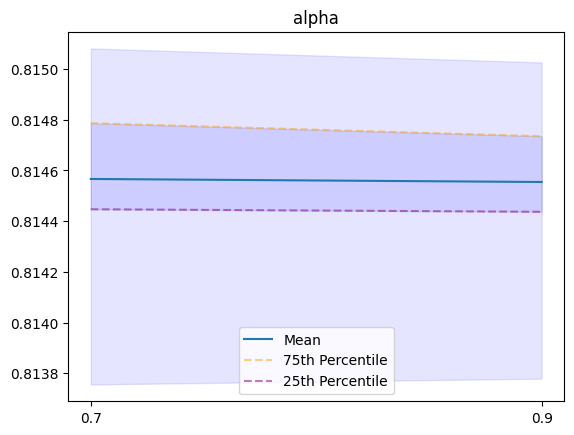

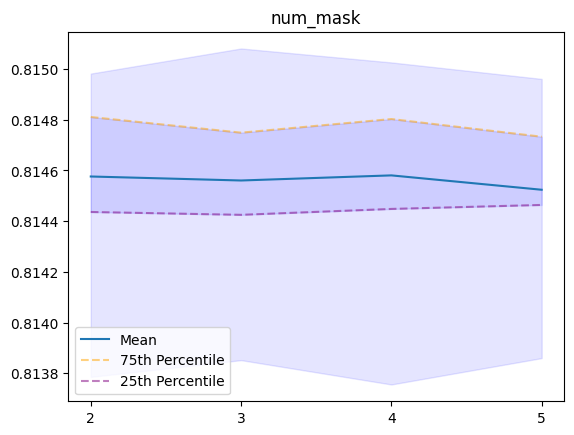

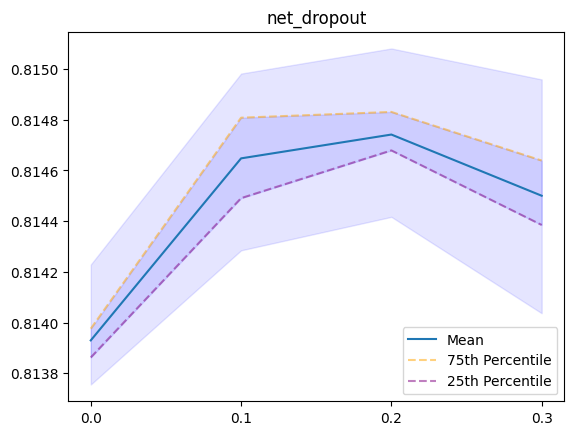

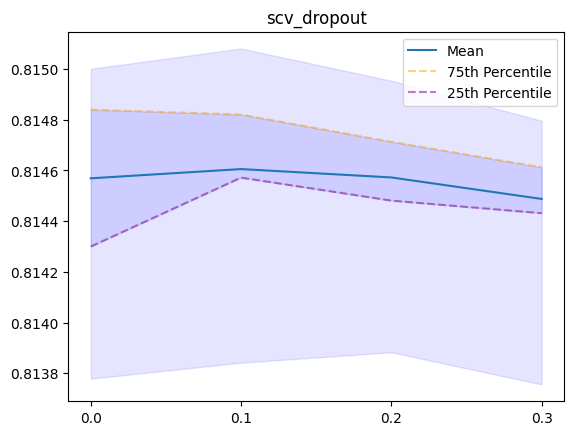

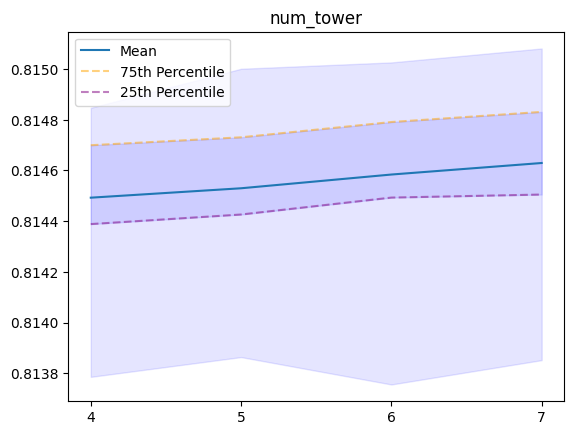

In [18]:
import matplotlib.pyplot as plt
import numpy as np

for col in multi_value_columns:
    x_label = hyper_df.groupby(col).max("AUC").index.values
    x = np.arange(len(x_label))
    
    quantile = hyper_df.groupby(col)["AUC"].quantile([0.25, 0.75]).values.reshape(-1, 2)
    top_quantile = quantile[:, 1]
    bot_quantile = quantile[:, 0]
    
    max_auc = hyper_df.groupby(col).max("AUC").values[:, 1]
    mean_auc = hyper_df.groupby(col).mean("AUC").values[:, 1]
    min_auc = hyper_df.groupby(col).min("AUC").values[:, 1]
    
    plt.plot(x, mean_auc, label="Mean")
    plt.fill_between(x, min_auc, max_auc, color="blue", alpha=0.1)
    plt.fill_between(x, bot_quantile, top_quantile, color="blue", alpha=0.1)
    
    # plt.plot(x, max_auc, color="red", linestyle="--", alpha=0.5, label="Max")  # Dotted line for max values
    # plt.plot(x, min_auc, color="green", linestyle="--", alpha=0.5, label="Min")  # Dotted line for min values
    plt.plot(x, top_quantile, color="orange", linestyle="--", alpha=0.5, label="75th Percentile")  # Dotted line for 75th percentile
    plt.plot(x, bot_quantile, color="purple", linestyle="--", alpha=0.5, label="25th Percentile")  # Dotted line for 25th percentile
    
    plt.xticks(ticks=x, labels=x_label)
    plt.title(col)
    plt.legend()
    plt.show()

In [19]:
hyper_df.sort_values("AUC", ascending=False).head(50)

,exp_id,logloss,AUC,alpha,net_dropout,num_mask,num_tower,scv_dropout
53,SCV_light_loca_adadis_Criteo_315_973af2c8,0.436919,0.815081,0.7,0.2,3,7,0.1
177,SCV_light_loca_adadis_Criteo_310_520e4337,0.436997,0.815026,0.9,0.2,4,6,0.1
251,SCV_light_loca_adadis_Criteo_269_e4f2026d,0.437079,0.815001,0.7,0.2,4,5,0
123,SCV_light_loca_adadis_Criteo_141_17eaa11e,0.437154,0.814982,0.7,0.1,4,5,0
41,SCV_light_loca_adadis_Criteo_154_03b4ab80,0.437055,0.814982,0.9,0.1,2,7,0
295,SCV_light_loca_adadis_Criteo_150_421a7b6f,0.437080,0.814970,0.9,0.1,4,6,0
192,SCV_light_loca_adadis_Criteo_319_2cbea0a0,0.437052,0.814961,0.7,0.2,5,7,0.1
152,SCV_light_loca_adadis_Criteo_444_95f842a4,0.437028,0.814959,0.9,0.3,3,7,0.1
87,SCV_light_loca_adadis_Criteo_153_112df293,0.437153,0.814957,0.7,0.1,2,7,0
163,SCV_light_loca_adadis_Criteo_144_82d724b1,0.437059,0.814957,0.9,0.1,5,5,0


In [20]:
# hyper_df[(hyper_df["alpha"] == 0.7) & (hyper_df["num_mask"] == 3) ]

In [21]:
# hyper_df[hyper_df["block1_dropout"] <= 0.3]

In [22]:
hyper_df.value_counts("num_mask")

num_mask
4    70
3    65
5    65
2    60
Name: count, dtype: int64

In [23]:
hyper_df.value_counts("net_dropout")

net_dropout
0.1    86
0.2    76
0.3    71
0.0    27
Name: count, dtype: int64

In [24]:
hyper_df.value_counts("mask_strategy")

KeyError: 'mask_strategy'

In [ ]:
hyper_df[(hyper_df["embedding_dim"] == 32) & hyper_df["use_feature_gating"] == True].sort_values("AUC", ascending=False).head(5)

KeyError: 'embedding_dim'

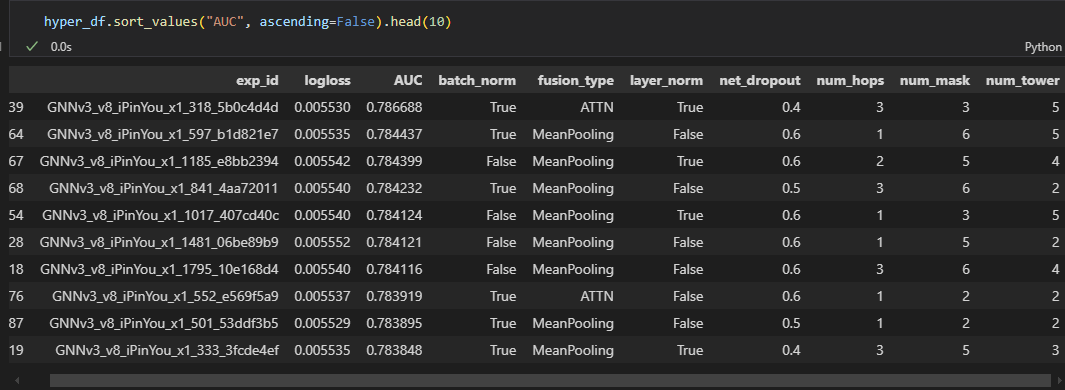

https://optuna.readthedocs.io/en/stable/reference/samplers/index.html

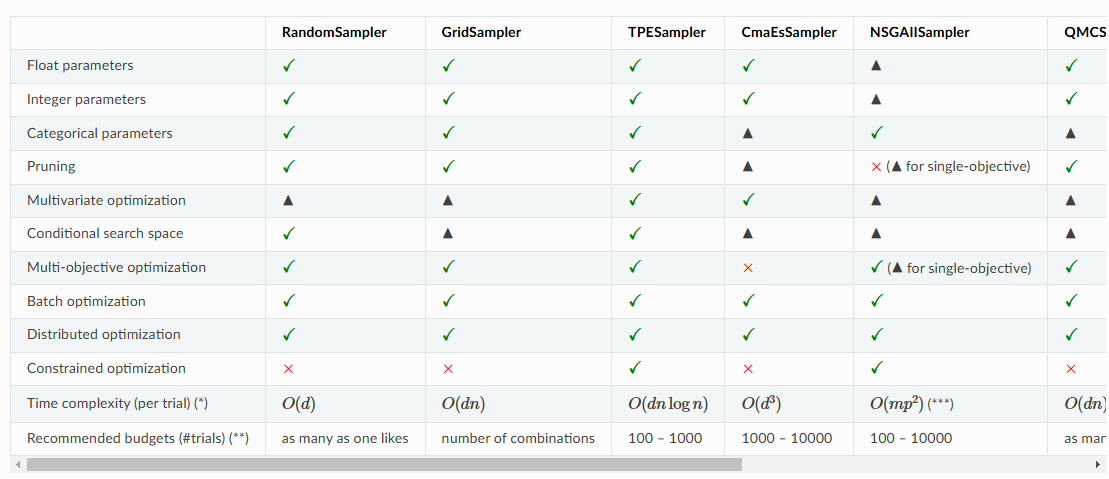

In [ ]:
for col in multi_value_columns:
    hyperparam_cnt_lst = np.array(hyper_df.groupby(col).count()["exp_id"].tolist())
    norm_lst = list(hyperparam_cnt_lst/total_exp_len)
    print(col)
    print(list(hyper_df.groupby(col).count().index))
    print([eval("{:.1f}".format(item*100)) for item in norm_lst])

In [ ]:
import numpy as np

probs = np.load("y_pred.npy")
probs

array([0.2478015 , 0.02584084, 0.67877942, ..., 0.60529333, 0.5425148 ,
       0.22743374])

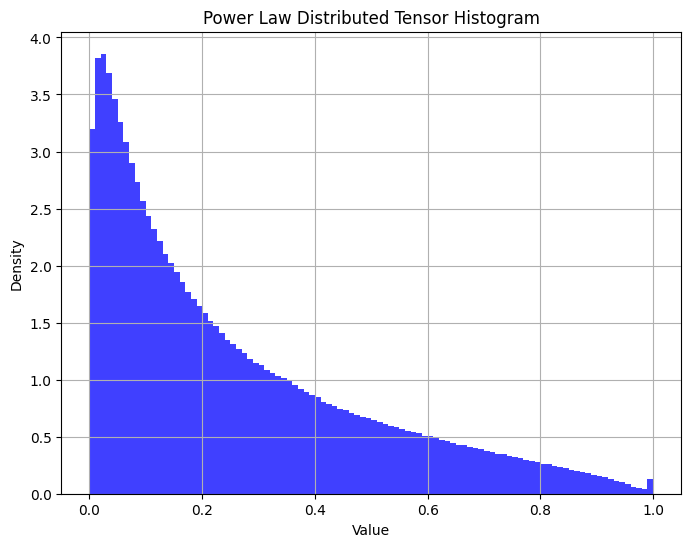

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
np.save("y_pred.npy", probs)
plt.hist(probs, bins=100, density=True, alpha=0.75, color='blue')
plt.title("Power Law Distributed Tensor Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
